In [17]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import expon
import seaborn as sns

In [2]:
import os
cwd = os.getcwd()
print(cwd)

/Users/luanbrito/Projects/bee6310


In [3]:
"""
Read csv file w/ daily Ithaca weather data from Cornell weather station source: https://www.ncei.noaa.gov/cdo-web/
"""

ithaca_data = pd.read_csv("Ithaca/data/3789953.csv")

print(ithaca_data[1:2])

       STATION        DATE  PRCP PRCP_ATTRIBUTES  SNOW SNOW_ATTRIBUTES  TMAX  \
1  USC00304174  1950-01-02   6.1        ,,0,0800   0.0            ,,0,   5.0   

  TMAX_ATTRIBUTES  TMIN TMIN_ATTRIBUTES  
1             ,,0   0.6             ,,0  


##### Some theory:
**Random Variable**: Variable whose values are numerical outcomes of a random process
**Random process**: A complex confluence of physical variables, often too difficult to model deterministically
**Probability density function (PDF)**: Characterize values of the Random Variable and associated probabilities

In [4]:
"""
First analysis
Yearly precipitation distribution
"""

'\nFirst analysis\nYearly precipitation distribution\n'

In [5]:
#1. Calculate yearly precipitation
# Convert Date from text to date 

print(ithaca_data['DATE'].dtype)
ithaca_data['DATE'] = pd.to_datetime(ithaca_data['DATE'] ) #Convert to datetime
print(ithaca_data['DATE'][2])
ithaca_data['YEAR'] = ithaca_data['DATE'].dt.year #Get year
print(ithaca_data['YEAR'][2])

prec_yearly=ithaca_data.groupby('YEAR',as_index=False)['PRCP'].agg(np.sum) #group by YEAR and sum PRCP
print(prec_yearly)

object
1950-01-03 00:00:00
1950
    YEAR    PRCP
0   1950  1017.3
1   1951   900.1
2   1952   878.7
3   1953   764.2
4   1954   930.6
..   ...     ...
70  2020   936.4
71  2021  1217.9
72  2022   899.1
73  2023  1079.8
74  2024   681.0

[75 rows x 2 columns]


/var/folders/y7/411dcnwj4853mcwpgyz634_m0000gn/T/ipykernel_1294/2783976204.py:10: FutureWarning: The provided callable <function sum at 0x11405fc40> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  prec_yearly=ithaca_data.groupby('YEAR',as_index=False)['PRCP'].agg(np.sum) #group by YEAR and sum PRCP


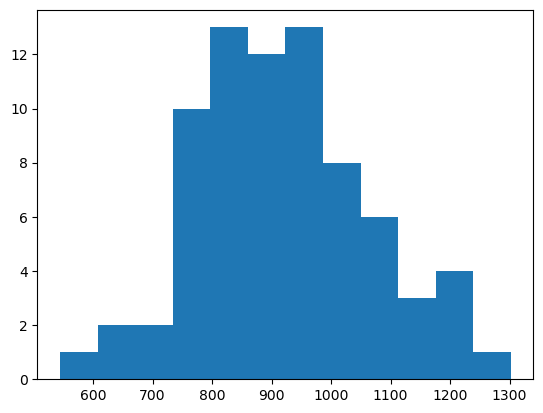

In [6]:
#Yearly preciptation histogram
plt.hist(prec_yearly['PRCP'],bins=12)
plt.show()

920.6666666666669
145.40341429584416


Text(0.5, 1.0, 'Fit results: mu = 920.67,  std = 145.40')

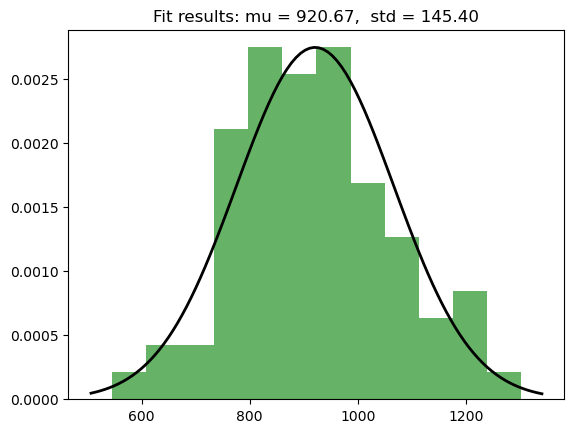

In [7]:
#Fit normal distribution
mean = np.mean(prec_yearly['PRCP'])
sd = np.std(prec_yearly['PRCP'])

#norm_dist = {'PRCP': norm.rvs(mean,sd,size=10000), 'index': 0} 
#norm_dist = pd.DataFrame(data=norm_dist)
#norm_dist['PRCP'].hist(bins=10)
#plt.show()

print(mean)
print(sd)

# Fit a normal distribution to the data:
mu, std = norm.fit(prec_yearly['PRCP'])

plt.hist(prec_yearly['PRCP'], bins=12, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)



In [8]:
#CDF YAY

# Probability of PRCP > 0 mm
prob = 1-norm.cdf(0,mu,std)
print('Probability of PRCP > 0 mm ',f'{prob:.2}') #num:.3 3 sig figs

# Probability of PRCP < 800 mm

print('Probability of PRCP < 800 mm ',f'{norm.cdf(800,mu,std):.2}') #num:.3 3 sig figs

# Probability of PRCP > 800 mm
prob = 1-norm.cdf(800,mu,std)
print('Probability of PRCP > 800 mm ',f'{prob:.2}') #num:.3 3 sig figs

# Probability of PRCP > 800 mm AND PRCP < 1200 mm
prob_1200 = norm.cdf(1000,mu,std)
prob_800 = norm.cdf(800,mu,std)
prob = prob_1200 - prob_800
print('Probability of PRCP > 800 mm AND PRCP < 1000 mm ',f'{prob:.2}') #num:.3 3 sig figs

Probability of PRCP > 0 mm  1.0
Probability of PRCP < 800 mm  0.2
Probability of PRCP > 800 mm  0.8
Probability of PRCP > 800 mm AND PRCP < 1000 mm  0.5


Steps in probabilistic modeling
- Pick a model
- Fit model to your data

Some examples
- Annual avg precipitation -> Normal Distribution
- Daily non zero precipitation -> Exponential
- Number of individuals species in 1 ha -> Poisson

##### **Maximum Likelihod Estimation (MLE)**

- Some random variable X
- Let's assume X foolows a dist. pdf fx(x| $\theta$)
- Assume that there is a true population $\theta$
    - $\theta$ fixed but unknown
- Estimate $\theta$ => denoted $\hat{\theta}$ based on sample

**MLE**: Develop estimate $\hat{\theta}$ that maximizes the likelihood that the observed data come from the dist. w/ pdf fx(x| $\theta$)

##### **Developing a score for goodness of fit**

**Likelihood Function** 

- Product of PDF
- To maximize, should take the derivative of product of PDF, usually is a pain
- Instead, log-likelihood function for mathmatical reasons

Step by step
1. Define likelihood function
2. Define log likelihood function
3. find $\theta$ to max L($\theta$)

**important:** when you apply log to product function it becomes a summatory following the property log(a * b) = log(a) + log(b)

In [9]:
#likelihood function
# model 1
model1 = norm.pdf(750,920,145)
model2 = norm.pdf(750,1000,50)

print('model 1',model1,' and model 2',model2)

model 1 0.0013837621039723583  and model 2 2.9734390294685957e-08


In [10]:
input = [750,800,850] # ! to do generate a sequence
model1 = norm.pdf(input,920,145)
prod_model1=np.prod(model1)
model2 = norm.pdf(input,920,145)
prod_model2=np.prod(model2)
print('model 1',f'{prod_model1:.2}',' and model 2',f'{prod_model2:.2}')

model 1 6.6e-09  and model 2 6.6e-09


**For the exponential distribution, the maximum likelihood:**

L($\lambda$) = $\large\prod_{i=1}^{n} \lambda e^{-\lambda x}$  

l($\lambda$) = $\large\sum_{i=1}^{n} log( \lambda e^{-\lambda x})$  

l($\lambda$)= $\large\sum_{i=1}^{n}$ log($\lambda$) + $\large\sum_{i=1}^{n} log(e^{-\lambda x})$

The mean $\bar{x}$ is:

$
\bar{x} = \large\sum_{i=1}^n\frac{x_i}{n}
$


l($\lambda$) = n log($\lambda$) - n $\lambda$ $\bar{x}$

Calculate 
$
\Large\frac{\partial l}{\partial \lambda} = 0
$


$
\Large\frac{\partial l}{\partial \lambda} = \frac{n}{\lambda} - n \bar{x}
$


$
\lambda = \Large\frac{1}{\bar{x}}
$


**For the Bernoulli distribution, the maximum likelihood:**

$
L(p) = \large\prod_{i=1}^{n} p^{x{_i}} (1-p)^{1-x{_i}}
$

$
l(p) = \large\sum_{i=1}^{n} x{_i} log(p) + \large\sum_{i=1}^{n} (1-x{_i}) log(1 - p)
$

The mean $\bar{x}$ is:

$
\bar{x} = \large\sum_{i=1}^n\frac{x_i}{n}
$

$
l(p) = n log(p) \bar{x} + log(1- p)(n - n \bar{x})
$

Calculate 
$
\Large\frac{\partial l}{\partial p} = 0
$



$
\Large\frac{\partial l}{\partial p} = \frac{n\bar{x}}{p} - \frac{(n - n\bar{x})}{1-p} = 0
$

$
\Large\frac{n\bar{x}}{p} = \frac{(n - n\bar{x})}{1-p}
$

$
n\bar{x}(1-p) = (n -n\bar{x})p
$

$
n\bar{x} - pn\bar{x} - np + pn\bar{x} = 0
$

$
pn = n\bar{x} 
$

$
p = \bar{x}
$

Asymptotic Normality of Maximum Likelihood


Sample distribution is the probability distribution that describes how on estimate (or other statistics) varies across samples of data

$
\hat{\theta} $ ~ $ N(\theta,J(\theta)^{-1})
$

$
J(\hat{\theta}) = \Large\frac{-\partial^2{l(x|\theta)}}{\partial{\theta}^2} \Big|_{\theta=\hat{\theta}_{MLE}}^ \
$

$J(\hat{\theta})$ = Observed Information

$J(\hat{\theta})$ provides a measure of how much information an observed RV X carries about an unknown parameter $\theta$ upon which prob. of X depends

**Confidence Interval**

$\hat{\theta}$ ~ $N(\theta) J(\hat{\theta})^{-1}$

Create a $(1 - \frac{\alpha}{2})$ = 100% CI for $\theta$

$\hat{\theta} \frac{+}{-} z_{\frac{alpha}{2}}\sqrt{J(\hat{\theta})^{-1}}$

$\sqrt{J(\hat{\theta})^{-1}}$ <- Standard Deviation

95% CI for $\theta$: [$\small\hat\theta - 1.96 \sqrt{J(\hat{\theta})^{-1}}, \hat\theta + 1.96 \sqrt{J(\hat{\theta})^{-1}} $]

In [11]:
ithaca_data['DATE'] = pd.to_datetime(ithaca_data['DATE'] ) #Convert to datetime
ithaca_data['MONTH'] = ithaca_data['DATE'].dt.month #Get year


In [12]:
ithaca_sample = ithaca_data[ithaca_data["MONTH"]==6]
ithaca_sample = ithaca_sample[ithaca_sample["PRCP"]>0]
u = np.mean(ithaca_sample["PRCP"])
print(u)

7.731901181525242


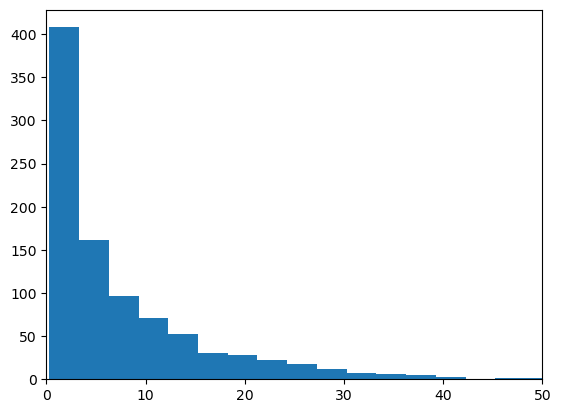

In [13]:
plt.hist(ithaca_sample["PRCP"],bins=30)
plt.xlim(0,50)
plt.show()

In [14]:
lambda_hat = 1/u
print(lambda_hat)

0.12933429651033562


(array([23., 28., 15., 17.,  5.,  8.,  0.,  0.,  1.,  0.,  0.,  3.]),
 array([0.05884412, 0.09681284, 0.13478156, 0.17275028, 0.210719  ,
        0.24868772, 0.28665643, 0.32462515, 0.36259387, 0.40056259,
        0.43853131, 0.47650003, 0.51446875]),
 <BarContainer object of 12 artists>)

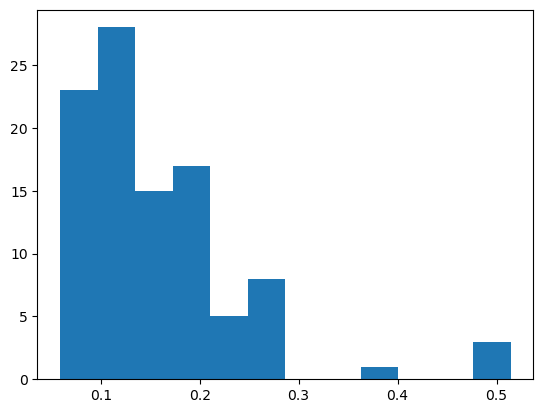

In [15]:
n = 5
x = []
for i in range(100): 
  dist=expon.rvs(0,1/lambda_hat,size=n)
  x.append(1/np.mean(dist))

plt.hist(x,bins=12)


(array([ 5., 12., 11., 21., 13., 14., 11.,  6.,  3.,  0.,  2.,  2.]),
 array([0.11188709, 0.11616492, 0.12044275, 0.12472059, 0.12899842,
        0.13327625, 0.13755408, 0.14183192, 0.14610975, 0.15038758,
        0.15466541, 0.15894325, 0.16322108]),
 <BarContainer object of 12 artists>)

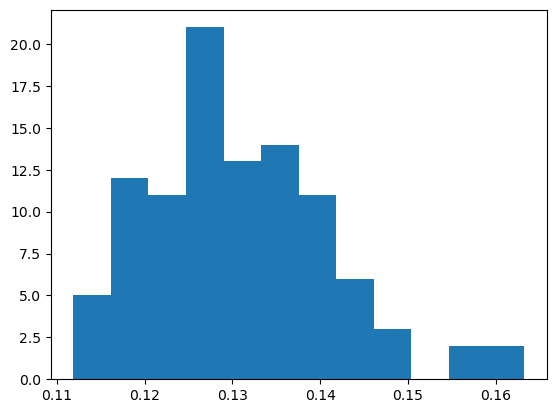

In [16]:
n = 200
x = []
for i in range(100): 
  dist=expon.rvs(0,1/lambda_hat,size=n)
  x.append(1/np.mean(dist))

plt.hist(x,bins=12)


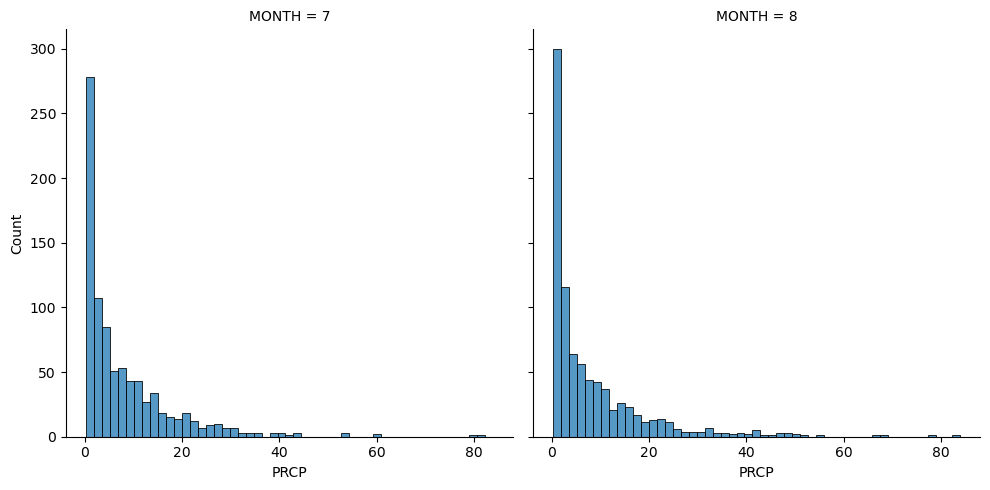

In [22]:
hist_data = ithaca_data[ithaca_data["MONTH"]>6]
hist_data = hist_data[hist_data["MONTH"]<9]
hist_data = hist_data[hist_data["PRCP"]>0.2]

sns.displot(data=hist_data,x="PRCP",col="MONTH")

plt.show()